Żeby kod działał bardziej optymalnie, każde zdjęcie chcemy zapisać w postaci 
trójwymiarowej macierzy w zapisie: długość x szerokość x 3 kanały kolorów (RGB).


In [1]:
#Zaimportowanie wymaganych bibliotek
import os
from pathlib import Path
import numpy as np
from PIL import Image

In [2]:
img = Image.open('data\\delaunay\\delaunay_test\\Ad Reinhardt\\8.png')

numpydata = np.asarray(img)
print(type(numpydata))
#obraz ma wymiar x na y na 3 (ostatni to kanały kolorów RGB)
print(numpydata.shape)

<class 'numpy.ndarray'>
(256, 323, 3)


In [3]:
#To train we will be using both delaunay test and train
DIR = 'data\\delaunay\\'
#final size of an images
IMG_SIZE = 64 #up to 256
#number of colours chanels
IMG_CHANNELS = 3 # RGB

In [4]:
path=Path(DIR)
a=0
for filename in path.rglob("*.png"):
    a+=1
print("Obrazów Abstrakcyjnych: %d"%a)

Obrazów Abstrakcyjnych: 11503


In [5]:
# Iterating over the images inside the directory and resizing them using
# Pillow's resize method.
# Resazing images to final size - we want all images to be the same size
# Also we are using AntiAlias to upgrade the quality of the images
path=Path(DIR)
train_data_raw=[]
for filename in path.rglob("*.png"):
    #lanczos also know as antialias function is the best quality filter for downscaling images, but has worst performance
    image = Image.open(filename).resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
    train_data_raw.append(np.asarray(image))
 


In [7]:
train_data=np.reshape(train_data_raw,(-1, IMG_SIZE, IMG_SIZE, IMG_CHANNELS)).astype("float64")
# normalization (all colours range from 0 to 255)
# and we want it to range from -1 to 1
train_data = (train_data / 255)*2-1
train_data.shape

(11503, 64, 64, 3)

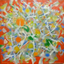

In [8]:
Image.fromarray(((train_data[110]+1)*255/2).astype(np.uint8))

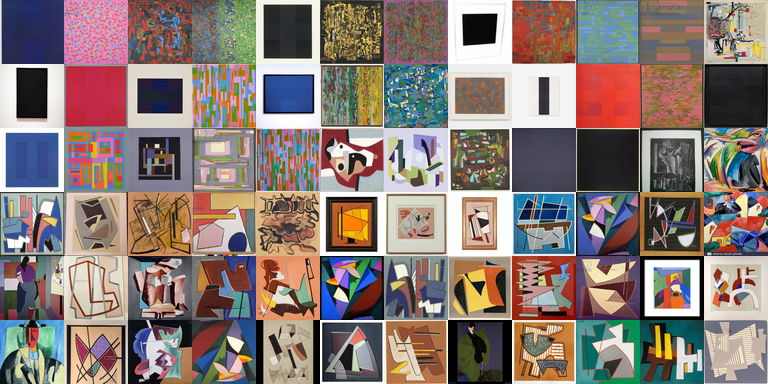

In [9]:
def gen_image(train_data,x=1, y=1):
    array=np.empty(((IMG_SIZE,IMG_SIZE,IMG_CHANNELS)),float)
    count=0
    for i in range(y):
        for j in range(x):
            if j==0:
                array_pom=np.array(train_data[count])
            else:
                array_pom=np.concatenate((
                    array_pom,np.array(train_data[count])),axis=1)
            count+=1
        if i==0:
            array=array_pom
        else:
            array=np.concatenate((array,array_pom),axis=0)
    array=(array+1)*255/2
    return array
arr=gen_image(train_data,12,6)
Image.fromarray(arr.astype(np.uint8))

In [12]:
#saving the numpy data images as the binary file for faster data processing on training
np.save('data\\delaunay_data_norm.npy', train_data)